In [153]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris = pd.read_csv(url, names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])

# 1- Take a quick look at the data structure:
a. Use head(), info(), and describe() (2.5 Marks)

In [166]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [167]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [168]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# b. Plot the relationship between the petal length and petal width (sample figureshown below): (5 Marks)

In [169]:
iris_setosa = iris.loc[iris['species'] == 'Iris-setosa']
iris_versicolor = iris.loc[iris['species'] == 'Iris-versicolor']
iris_virginica = iris.loc[iris['species'] == 'Iris-virginica']

Relationship between petal length and petal width:

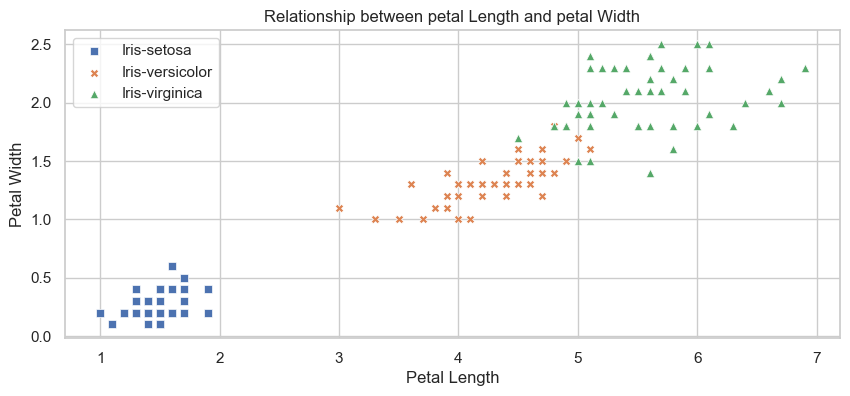

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns


markers= ["s", "X", "^"]
labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

hyperparams = zip(markers, labels)

fig, ax = plt.subplots(figsize=(10,4))
sns.set(style='whitegrid')

datasets = [iris_setosa, iris_versicolor, iris_virginica]
        
for i, dataFrame in enumerate(datasets):
    sns.scatterplot(x=dataFrame.petal_length, y=dataFrame.petal_width, marker=markers[i], label=labels[i])
    

 
plt.title("Relationship between petal Length and petal Width")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend(loc="best")
plt.show()

Relationship between sepal length and sepal width:

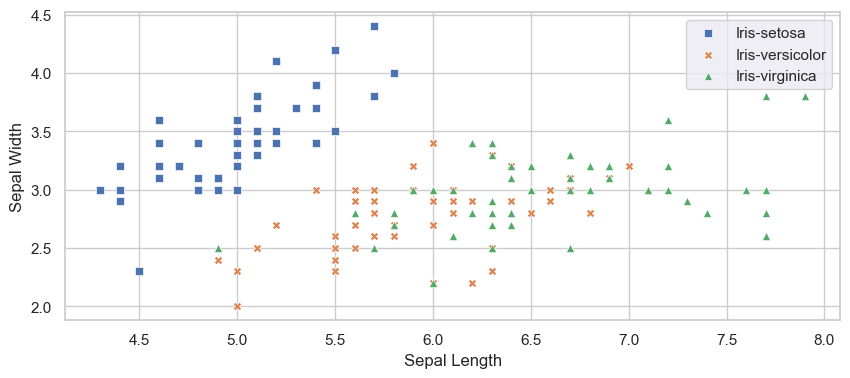

In [174]:
fig, ax = plt.subplots(figsize=(10,4))
sns.set(style='darkgrid')

for i, dataFrame in enumerate(datasets):
    sns.scatterplot(x=dataFrame.sepal_length, y=dataFrame.sepal_width, marker=markers[i], label=labels[i])
    


plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(loc='best')
plt.show()

 # 2- Check if there are null values and fill them with the average value of that attribute if it is numerical, and with the most common occurrence of that attribute if it is categorical (2.5 Marks).
Tip: If there are Tip: If there are no null values, you don’t need to write the code for filling in the numerical and categorical missing values.

In [175]:
iris.isnull().sum().sum()


0

# 3- Split the data into 80% training set and 20% testing set, use the stratify option to ensure you have all three classes represented in the training set (10 Marks).
Tip:  Use the following code to generate y:
key = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
 y = iris_data['species'].map(key)

In [176]:
from sklearn.model_selection import train_test_split
X = iris.drop("species", axis=1)
key = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
y = iris['species'].map(key)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 4- Train a Support Vector Machine Classifier (SVC) to predict the species of the iris, with a Polynomial Kernel. (10 Marks)
Tip: Use make_pipeline to include a StandardScaler, e.g., poly_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel="poly", degree=3, coef0=1, C=5))

In [67]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler

In [68]:
poly_kernel_svm_clf = make_pipeline(StandardScaler(),
    SVC(kernel="poly", degree=3, coef0=1, C=5))


poly_kernel_svm_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

# 5- Make predictions using cross-validation with cv=3.

Checking the shapes of our train and test attributes

In [69]:
X_train.shape

(120, 4)

In [70]:
y_train.shape

(120,)

In [71]:
y_test.shape

(30,)

In [72]:
X_test.shape

(30, 4)

In [177]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(poly_kernel_svm_clf, X_train, y_train, cv=3)

In [178]:
y_pred[0:5]  # first five predicted values

array([0, 2, 1, 0, 1], dtype=int64)

In [179]:
y_test.iloc[:5].values  # first five actual values 

array([0, 2, 1, 1, 0], dtype=int64)

# 6- Report on the following performance metrics (10 Marks):
Plot the confusion matrix (sample figure shown below):

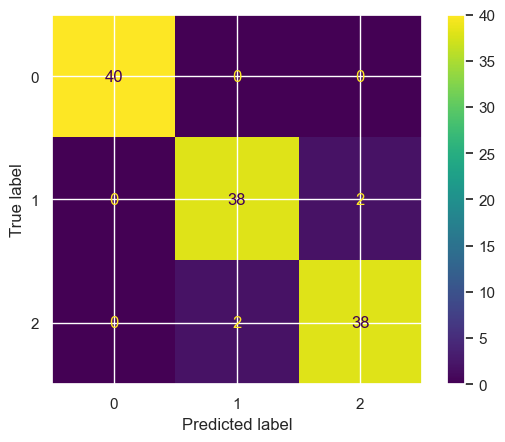

In [180]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_pred)

In [181]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

0.9666666666666667

# 7- Repeat steps 4 to 6 with a Gaussian RBF Kernel. (20 Marks)

In [182]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
    SVC(kernel="rbf", gamma=2, C=20))


rbf_kernel_svm_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=20, gamma=2))])

Make predictions using cross-validation with cv=3

In [183]:
y_pred_rbf = cross_val_predict(rbf_kernel_svm_clf, X_train, y_train, cv=3)

In [184]:
y_pred_rbf

array([0, 1, 1, 0, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 2, 2, 0, 1, 0, 2,
       0, 0, 2, 0, 2, 0, 0, 1, 2, 1, 0, 2, 1, 2, 0, 2, 0, 1, 2, 0, 2, 1,
       2, 1, 1, 2, 0, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 2, 2, 0, 2, 0, 2, 1,
       1, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1,
       0, 2, 1, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

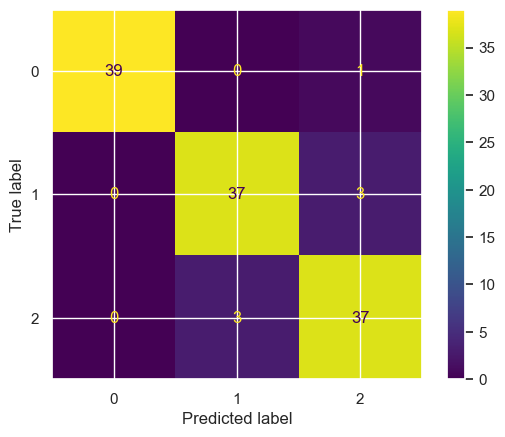

In [185]:
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_rbf)

In [186]:
accuracy_score(y_train, y_pred_rbf)

0.9416666666666667

# 8- Repeat steps 4 to 6 with a k-NN classifier and k=10. (20 Marks)

In [187]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = make_pipeline(StandardScaler(),
    KNeighborsClassifier(n_neighbors=10))

knn_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=10))])

Make predictions using cross-validation with cv=3

In [188]:
y_pred_knn = cross_val_predict(knn_clf, X_train, y_train, cv=3)
y_pred_knn

array([0, 1, 1, 0, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 0, 1, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 0, 2, 0, 1, 2, 0, 2, 1,
       2, 1, 1, 2, 0, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1,
       1, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1,
       0, 2, 1, 1, 0, 0, 0, 0, 2, 0], dtype=int64)

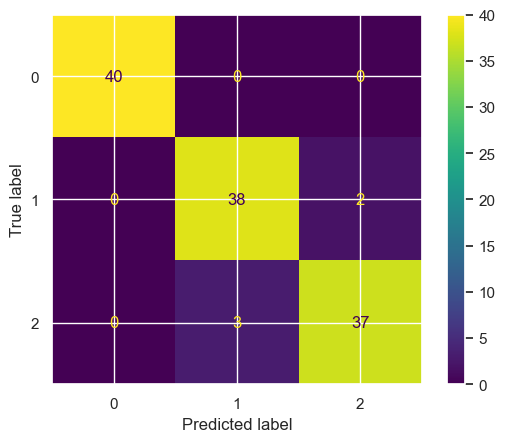

In [189]:
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_knn)

In [190]:
accuracy_score(y_train, y_pred_knn)

0.9583333333333334

# Question#2 (20 Marks): Create a moons dataset with make_moons command, and choose the number of samples and noise level.


In [191]:
from sklearn.datasets import make_moons

In [192]:
X_moon, y_moon = make_moons(n_samples=100, noise=0.15, random_state=42)


# 1- Train a SVM classifier on the moons dataset you created. (10 Marks)

Poly Kernel SVM

In [193]:
svm_moon_clf = make_pipeline(StandardScaler(),
    SVC(kernel="poly", degree=3, coef0=1, C=5))  #Creating a moons classifier


svm_moon_clf.fit(X_moon, y_moon)  # fitting the model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

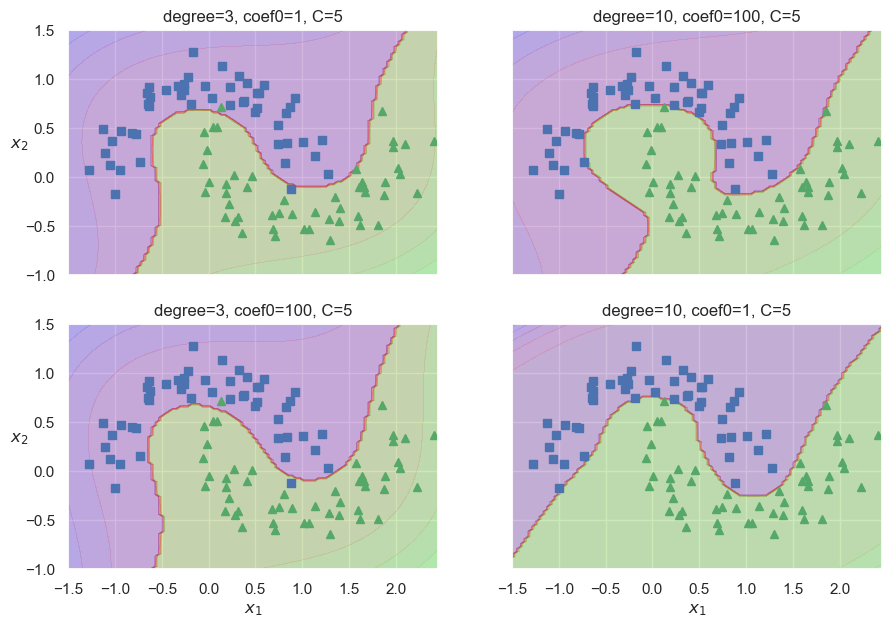

In [194]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)



degree1, degree2 = 3, 10
coef1, coef2 = 1, 100
hyperparams = (degree1, coef1), (degree2, coef2), (degree1, coef2), (degree2, coef1)

svm_clfs = []
for deg, coef in hyperparams:
    poly_svm_moon_clf = make_pipeline(StandardScaler(),
                                      SVC(kernel='poly', degree=deg, coef0=coef, C=5)
                                     )
    poly_svm_moon_clf.fit(X_moon, y_moon)
    svm_clfs.append(poly_svm_moon_clf)
    
    
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X_moon, y_moon, [-1.5, 2.45, -1, 1.5])
    degree, coef0 = hyperparams[i]
    plt.title(f"degree={degree}, coef0={coef0}, C=5")
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()


Text(0, 0.5, '')

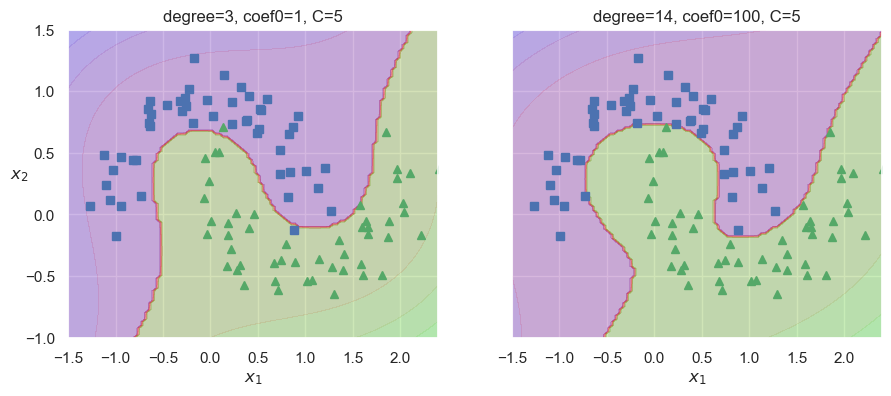

In [195]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(svm_moon_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X_moon, y_moon, [-1.5, 2.4, -1, 1.5])
plt.title("degree=3, coef0=1, C=5")

svm_moon_clf2 = make_pipeline(StandardScaler(),
                             SVC(kernel="poly", degree=14, coef0=100, C=5))

svm_moon_clf2.fit(X_moon, y_moon)

plt.sca(axes[1])
plot_predictions(svm_moon_clf2, [-1.5, 2.45, -1, 1.5])
plot_dataset(X_moon, y_moon, [-1.5, 2.4, -1, 1.5])
plt.title("degree=14, coef0=100, C=5")
plt.ylabel("")

rbf kernel SVM moon

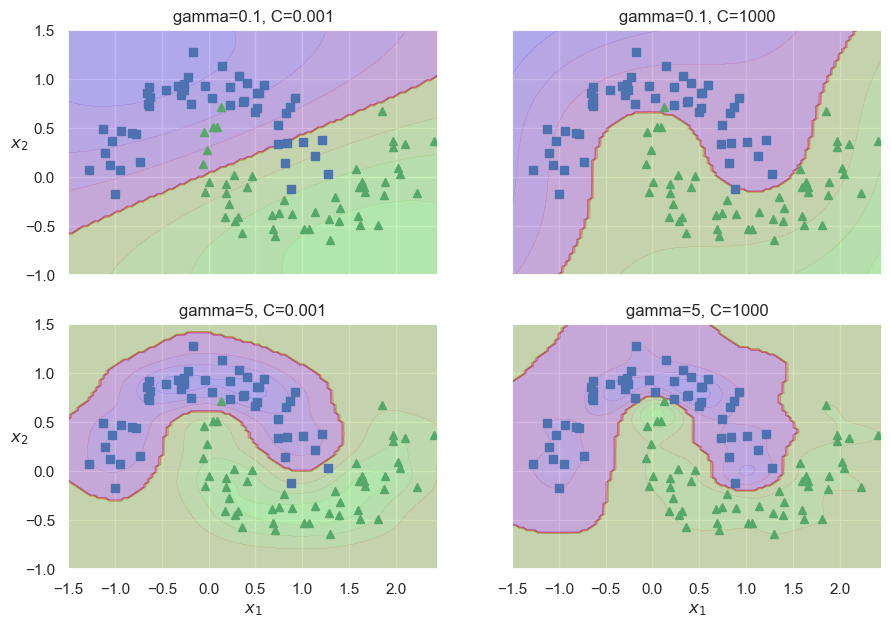

In [196]:
rbf_kernel_clf = make_pipeline(StandardScaler(),
                              SVC(kernel="rbf", gamma=0.1, C=0.001))

rbf_kernel_clf.fit(X_moon, y_moon)

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = make_pipeline(
        StandardScaler(),
        SVC(kernel="rbf", gamma=gamma, C=C)
    )
    rbf_kernel_svm_clf.fit(X_moon, y_moon)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X_moon, y_moon, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(f"gamma={gamma}, C={C}")
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")
plt.show()

# references
handson-ml3/05_support_vector_machines.ipynb at main · ageron/handson-ml3. (n.d.). GitHub. Retrieved October 22, 2022, from https://github.com/ageron/handson-ml3/blob/main/05_support_vector_machines.ipynb